In [1]:
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
import category_encoders as ce
from sklearn.multiclass import OneVsRestClassifier

In [2]:
df = pd.read_csv('drug.csv');

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [5]:
df.shape

(200, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [9]:
labels = pd.Categorical(df['Drug'])
labels

['DrugY', 'drugC', 'drugC', 'drugX', 'DrugY', ..., 'drugC', 'drugC', 'drugX', 'drugX', 'drugX']
Length: 200
Categories (5, object): ['DrugY', 'drugA', 'drugB', 'drugC', 'drugX']

In [10]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

<AxesSubplot:>

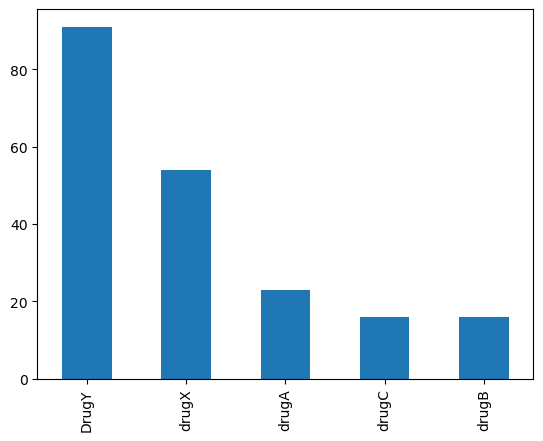

In [11]:
df['Drug'].value_counts().plot.bar()

In [12]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

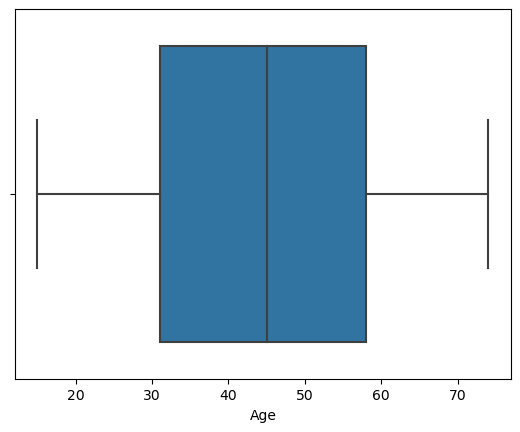

In [13]:
sns.boxplot(df['Age'])

In [14]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Na_to_K'>

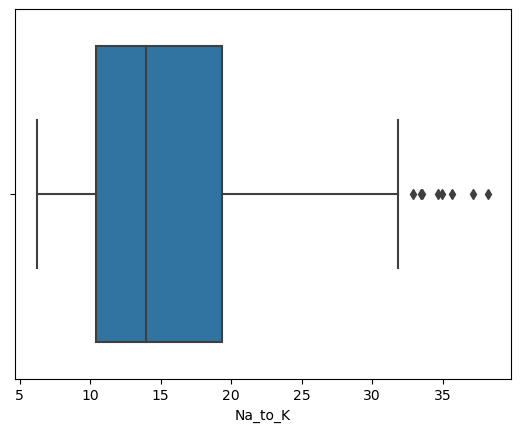

In [15]:
sns.boxplot(df['Na_to_K'])

In [16]:
#iqr
##removing outliers

def remove_outliers(col):
    q1 = df[col].quantile(0.25);
    q3 = df[col].quantile(0.75);
    iqr = q3 - q1;
    
    max_ = q3 + (1.5*iqr);
    min_ = q1 - (1.5*iqr);
    
    df[col][df[col] < min_] = min_;
    df[col][df[col] > max_] = max_;
    

In [17]:
remove_outliers('Na_to_K')

C:\Users\win10\AppData\Local\Temp\ipykernel_9516\2656871547.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] < min_] = min_;
C:\Users\win10\AppData\Local\Temp\ipykernel_9516\2656871547.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] > max_] = max_;


In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder(); 
df_new = df.copy();

In [19]:
for col in df.columns:
    if (col == 'Drug','Sex', 'BP', 'Cholesterol'):
        df_new[col] = encoder.fit_transform(df_new[col]); 

In [20]:
df = df.drop(['Na_to_K'], axis=1)

In [21]:
df_new

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,8,0,0,0,167,0
1,30,1,1,0,89,3
2,30,1,1,0,43,3
3,12,0,2,0,10,4
4,44,0,1,0,133,0
...,...,...,...,...,...,...
195,39,0,1,0,69,3
196,1,1,1,0,75,3
197,35,1,2,0,36,4
198,8,1,2,1,102,4


In [22]:
from sklearn.preprocessing import MinMaxScaler;

df_scaled = df_new.copy();
scaler = MinMaxScaler();

In [23]:
for col in df_scaled.columns:
    if (col == 'Drug'):
        df_scaled[col] = scaler.fit_transform(df_scaled[col].values.reshape(-1,1)); 

In [24]:
df_scaled

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,8,0,0,0,167,0.00
1,30,1,1,0,89,0.75
2,30,1,1,0,43,0.75
3,12,0,2,0,10,1.00
4,44,0,1,0,133,0.00
...,...,...,...,...,...,...
195,39,0,1,0,69,0.75
196,1,1,1,0,75,0.75
197,35,1,2,0,36,1.00
198,8,1,2,1,102,1.00


<AxesSubplot:>

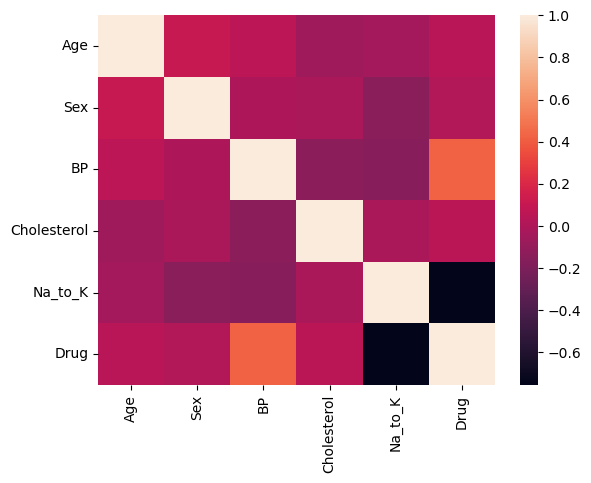

In [25]:
sns.heatmap(df_scaled.corr())

In [26]:
from sklearn.preprocessing import label_binarize

X = df_scaled.drop(['Drug'],axis = 1)
y = df_scaled['Drug']
# Binarize the output
#y = label_binarize(y, classes=[0, 1, 2,3,4])


In [27]:

from sklearn.model_selection import train_test_split;
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42, train_size = .80, stratify = y)
print(X.shape) # 100%
print(X_train.shape) #.80
print(X_test.shape) #.20

(200, 5)
(160, 5)
(40, 5)


In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

def evaluate_model(model):
    print('Classification Report \n', classification_report(y_test, model.predict(X_test), target_names = ['0','1','2','3','4']));
    #print('Confusion Matrix \n', confusion_matrix(y_test, model.predict(X_test), labels = [0,1]));
    print('Training Accuracy Score : ', model.score(X_train, y_train))
    print('Test Accuracy Score : ', model.score(X_test, y_test))
    plot_roc_curve(model, X_test,y_test)
    #print(OneVsRestClassifier(LinearSVC(random_state=10)).fit(X, y).predict(X))
    #print(y_score)
    

In [29]:
#import DTC
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier() #create an instance
dtc.fit(X_train, y_train) #fit train to algo
dtc.score(X_test, y_test) # fit test to algo
evaluate_model(dtc) # evaluate model

ValueError: Unknown label type: 'continuous'

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)
evaluate_model(rfc) # evaluate model

In [ ]:
# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
classes = model_multiclass.classes_
roc_auc_ovr = {}
for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
#     df_aux = X_test.copy()
#     df_aux['class'] = [1 if y == c else 0 for y in y_test]
#     df_aux['prob'] = y_proba[:, i]
#     df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df['Drug'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df['Drug'])
plt.tight_layout()